# Necessary Packages for Training Datasetes      

In [11]:
# Core Libraries
import numpy as np
import warnings

# Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# TensorFlow and Keras Core
import tensorflow as tf
import keras

# Image Preprocessing (if used later in data augmentation)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.preprocessing.image

# Pre-trained Models
from tensorflow.keras.applications import VGG19

# Layers
from keras.layers import Input  # Input layer
from keras.layers import GlobalAveragePooling2D  # Global average pooling layer
from keras.layers import Dense, Dropout  # Dense and dropout layers
from keras.layers import BatchNormalization  # Batch normalization layer
from keras.layers import Activation  # Activation functions (e.g., ReLU)


from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import SpatialDropout2D, Add
from tensorflow.keras.optimizers import Adam

# Model
from keras.models import Model

# Optimizers
from tensorflow.keras.optimizers import SGD


In [12]:

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam 


# Assign Image size and Training Rate

In [3]:
warnings.filterwarnings('ignore')
IMAGE_SIZE = (128,128)
INPUT_SHAPE = (128,128, 3)
TRAINING_RATE = 0.0001

# Load Training and Testing Datasets to generate Model

In [4]:
#read the train and test dataset
train_datagen = ImageDataGenerator()
validate_datagen = ImageDataGenerator()

training_set = train_datagen.flow_from_directory(
            'Dataset/train',
            target_size = IMAGE_SIZE,
            class_mode = 'categorical',
            batch_size = 20)

validation_set = validate_datagen.flow_from_directory(
            'Dataset/val',
            target_size = IMAGE_SIZE,
            class_mode = 'categorical',
            batch_size = 20)

classes = {v: k for k, v in training_set.class_indices.items()}
classes

Found 2553 images belonging to 2 classes.
Found 637 images belonging to 2 classes.


{0: 'Monkeypox', 1: 'Non Monkeypox'}

# Initialize Training method and Training Rate

In [5]:
# Define the input shape and classes
input_shape = (128, 128, 3)  # Adjust this according to your needs

# Define the input layer
inputs = Input(input_shape)

# Load the VGG19 model with pre-trained ImageNet weights, excluding the top layers
vgg19 = VGG19(include_top=False, input_shape=input_shape, weights='imagenet')(inputs)

# Add global average pooling
x = GlobalAveragePooling2D()(vgg19)

# Add fully connected layers with batch normalization, dropout, and ReLU activation
# Layer 1
x = Dense(1024)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)


# Final output layer with softmax activation for multi-class classification
# Make sure 'classes' is defined somewhere in your actual code.
outputs = Dense(len(classes), activation='softmax')(x)

# Define the optimizer
opt1 = SGD(learning_rate=0.0001)  # Adjust the learning rate if needed

# Create the model
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=opt1,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 1024)              0     

# To Start Training Process

In [6]:
# Training
Training_model = model.fit(training_set,
                    steps_per_epoch= len(training_set),
                    epochs=10,
                    validation_data= validation_set,
                    validation_steps =len(validation_set))

Epoch 1/10
128/128 [==============================] - 1416s 11s/step - loss: 0.9007 - accuracy: 0.5809 - val_loss: 0.5269 - val_accuracy: 0.7457
Epoch 2/10
128/128 [==============================] - 1400s 11s/step - loss: 0.6383 - accuracy: 0.7019 - val_loss: 0.3874 - val_accuracy: 0.8383
Epoch 3/10
128/128 [==============================] - 1366s 11s/step - loss: 0.5359 - accuracy: 0.7568 - val_loss: 0.3213 - val_accuracy: 0.8728
Epoch 4/10
128/128 [==============================] - 1410s 11s/step - loss: 0.4670 - accuracy: 0.7975 - val_loss: 0.2853 - val_accuracy: 0.9152
Epoch 5/10
128/128 [==============================] - 1348s 11s/step - loss: 0.4283 - accuracy: 0.8155 - val_loss: 0.2459 - val_accuracy: 0.9105
Epoch 6/10
128/128 [==============================] - 1341s 10s/step - loss: 0.3968 - accuracy: 0.8327 - val_loss: 0.2144 - val_accuracy: 0.9294
Epoch 7/10
128/128 [==============================] - 1392s 11s/step - loss: 0.3444 - accuracy: 0.8543 - val_loss: 0.2058 - val_ac

# Save Trainned Model

In [13]:
model.save("Trained_Models/LastModel.h5")


# Visualize the Trainned model accuracy

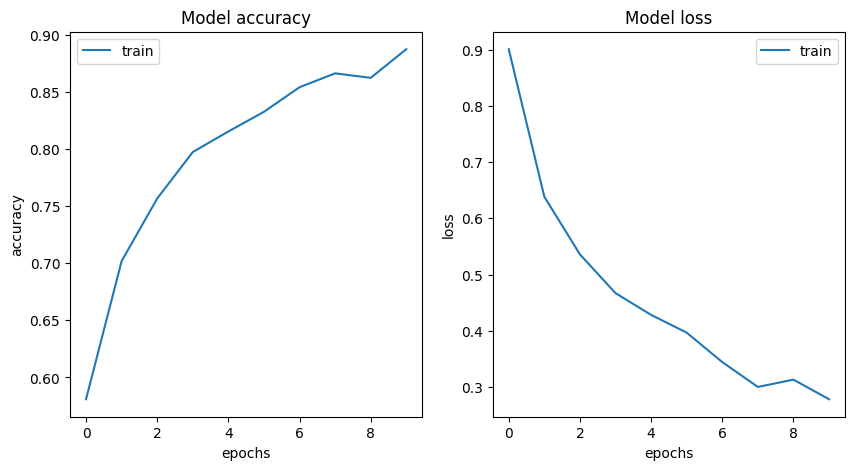

In [14]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax = ax.ravel()
for i, met in enumerate(['accuracy','loss']):
    ax[i].plot(Training_model.history[met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train'])
    
plt.show()

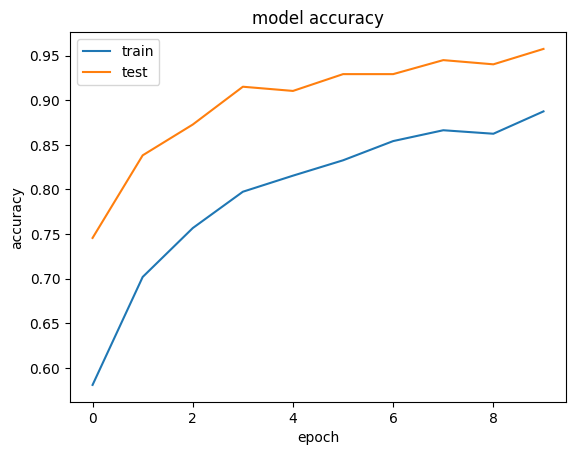

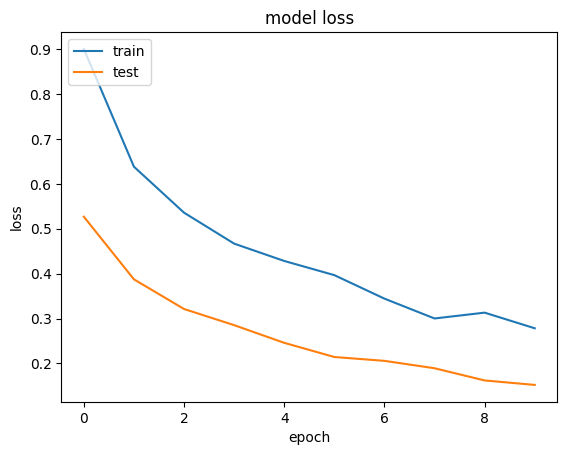

In [9]:
plt.plot(Training_model.history['accuracy'])
plt.plot(Training_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(Training_model.history['loss'])
plt.plot(Training_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [3]:
import tensorflow as tf



In [4]:
from tensorflow.keras.models import load_model
model = load_model("Trained_Models/LastModel.h5")